# **PURVANUMAN | Phising Website Detection**

### **Importing Required Libraries**

In [38]:
#importing basic required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter the uneccesary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
link="https://drive.google.com/open?id=1ZjR4-A8TrViaRXC_BYjRme5jo0udrLpz"

Seperating File Id from rest of the Link

In [4]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ZjR4-A8TrViaRXC_BYjRme5jo0udrLpz


In [5]:
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('Training Dataset.csv')

In [6]:
df = pd.read_csv('Phishing.csv')

## **Studying the Trends in Data (EDA)**

In [7]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1
Favicon,1,1,1,1,1,1,1,1,1,1


Checking for null values in the dataframe

In [8]:
df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [9]:
#Basic info about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [10]:
#Using Describe Method to see patterns in data along with min,max and quarlitles for each column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [11]:
#Checking the values in Results column
df["Result"].unique()

array([-1,  1], dtype=int64)

In [12]:
x,y=0,0 #setting individual couter values to 0

In [13]:
#grouping data according to Result labels
cls=[(1,x),(-1,y)]
for i in range(0,len(df)): #this loop functions as a counnter loop
  if df['Result'].iloc[i]==1:
    x=x+1
  else:
    y=y+1
cls

[(1, 0), (-1, 0)]

In [14]:
#the above code can simply be written using inbuilt function counter
from collections import Counter
classes=Counter(df["Result"].values)
class_dist=pd.DataFrame(classes.most_common(),columns=["Class","Num_of_Observations"])
class_dist

,Class,Num_of_Observations
0,1,6157
1,-1,4898


## **Basic Plots and Graphical Representation of Relations (EDA)**

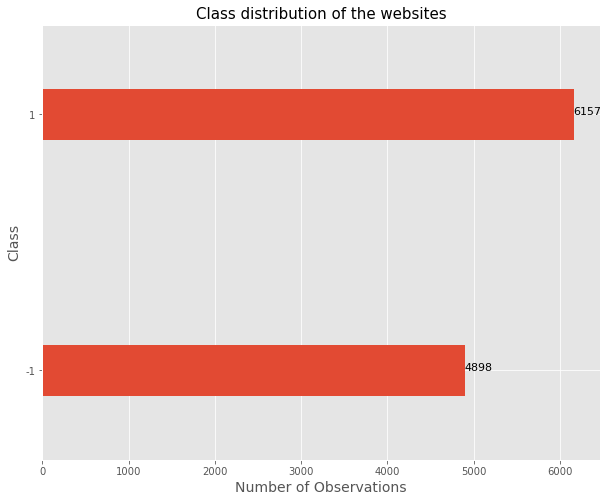

In [15]:
#plotting the class distribution of each class
plt.style.use('ggplot')

subplot = class_dist.groupby('Class')['Num_of_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Class distribution of the websites', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
subplot.set_ylabel('Class', fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=11)

<AxesSubplot:>

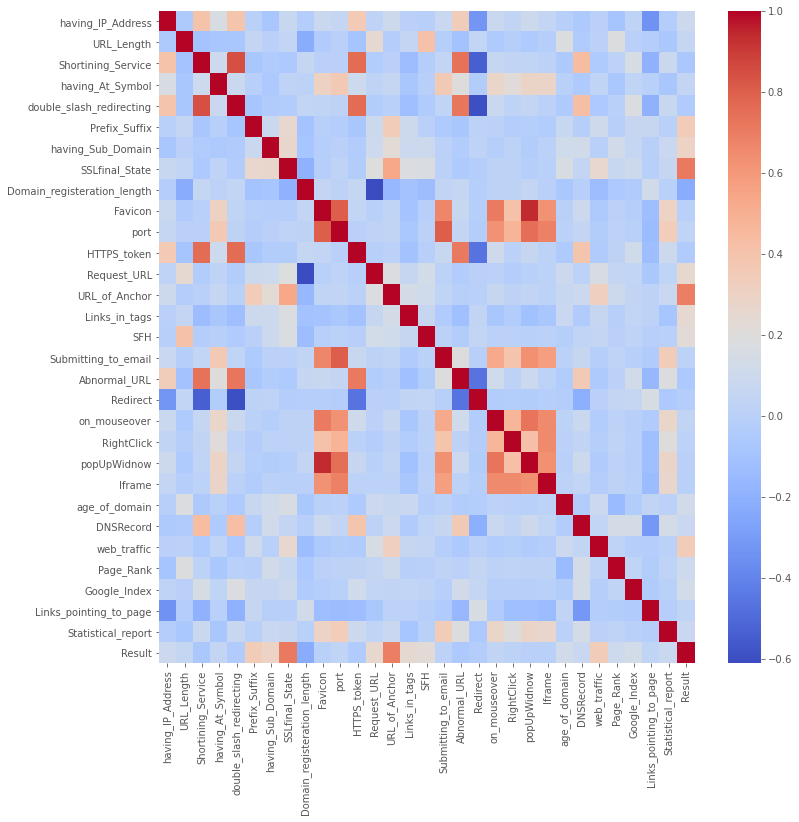

In [16]:
#heatmap of correlation between columns of data
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap="coolwarm")

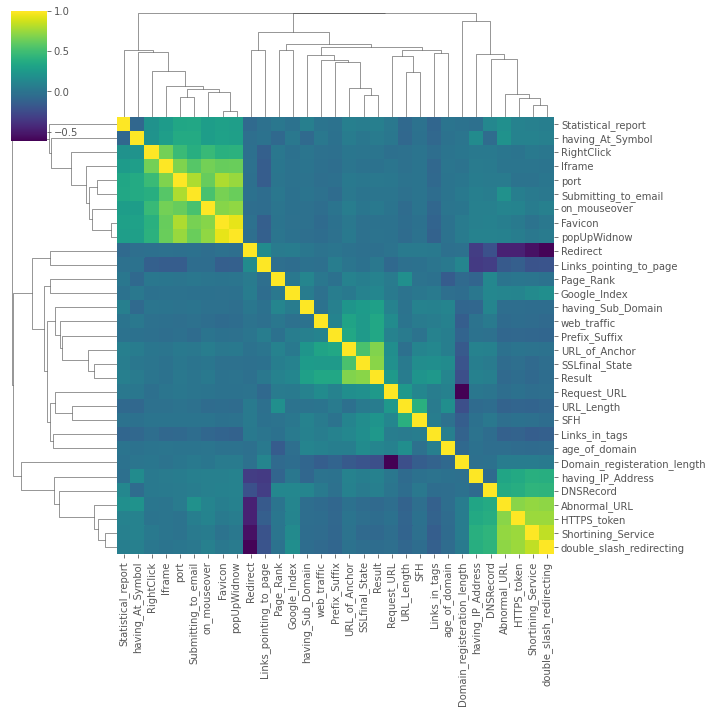

In [17]:
#clustermapping the dataframe correlations
sns.clustermap(df.corr(),cmap='viridis')

<AxesSubplot:>

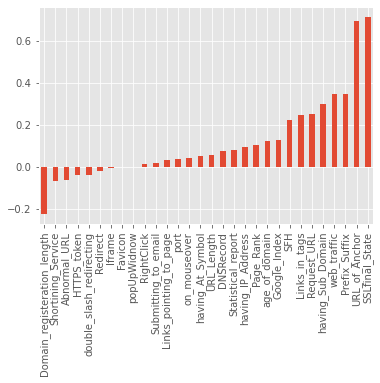

In [18]:
#bar plot of correlation with Result label makes it easy to understand dependencies
df.corr()["Result"][:-1].sort_values().plot(kind='bar')

## **Processing the Data and splitting into Training and Testing Data**

Generally Machine Learning Classifiers have trouble interpreting the -1 and 1 values used in the Result column, basically it expects 0 and 1 labels.

In [19]:
#using .map function to change -1 values to 0
df['Result'] = df['Result'].map({-1:0, 1:1})
df['Result'].unique()

array([0, 1], dtype=int64)

Splitting the Data into Training and Test Dataframes.

In [20]:
from sklearn.model_selection import train_test_split
X=df.drop("Result",axis=1).values
y=df["Result"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## **Logistic Regression**

Building Logistic Regression Model.

In [21]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression()

Predicting and evaluating using Logistic Regression Model.

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score
print('Accuracy score of the Logistic Regression classifier with default hyperparameter values {0:.2f}%'.format(accuracy_score(y_test, lm.predict(X_test))*100.))
print('F1 score of the Logistic Regression classifier with default hyperparameter values {0:.2f}%'.format(f1_score(y_test, lm.predict(X_test))*100.))
print('\n')
print('----Classification report of the Logistic Regression classifier with default hyperparameter value----')
print('\n')
print(classification_report(y_test, lm.predict(X_test), target_names=['Phishing Websites', 'Normal Websites']))
print(confusion_matrix(y_test, lm.predict(X_test)))

Accuracy score of the Logistic Regression classifier with default hyperparameter values 92.22%
F1 score of the Logistic Regression classifier with default hyperparameter values 93.10%


----Classification report of the Logistic Regression classifier with default hyperparameter value----


                   precision    recall  f1-score   support

Phishing Websites       0.92      0.91      0.91       971
  Normal Websites       0.93      0.94      0.93      1240

         accuracy                           0.92      2211
        macro avg       0.92      0.92      0.92      2211
     weighted avg       0.92      0.92      0.92      2211

[[ 879   92]
 [  80 1160]]


Adjusting the Model parameters to increase accuracy and provide better predictions.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# Define the grid of values
penalty = ['l1','l2']
C = [0.5,0.6,0.7,0.8, 0.9, 1.0]
tol = [0.01, 0.001 ,0.0001,0.000001]
max_iter = [100, 150, 200, 250,300]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(penalty=penalty, C=C, tol=tol, max_iter=max_iter)


Predicting using optimized parameters.

In [24]:
random_model = RandomizedSearchCV(estimator=lm, param_distributions=param_grid, cv=5)

# Fit random_model to the data
random_model_result = random_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score: %.2f using %s" % (best_score*100., best_params))

Best score: 92.91 using {'tol': 1e-06, 'penalty': 'l2', 'max_iter': 300, 'C': 0.7}


In [25]:
opt_pred=random_model.predict(X_test)

We se values extremely similar to our orignal Logistic Regression model which suggests that the parameter tuning did not help the model.


In [26]:
print(confusion_matrix(y_test,opt_pred))
print(classification_report(y_test,opt_pred))

[[ 879   92]
 [  80 1160]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       971
           1       0.93      0.94      0.93      1240

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



## **K-Nearest Neighbours**

Implementing K-Nearest Neighbour Algorithm.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[ 881   90]
 [  99 1141]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.90       971
           1       0.93      0.92      0.92      1240

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



Using Elbow Method to get optimal value of K.

In [28]:
error_rate = []
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
min(error_rate)

0.048846675712347354

Here we notice no elbows are formed and the error rate keeps rising in a staggered but continuous fashion with lowest value at k=1. We generally do not use k=1 so we use k=3 

Text(0, 0.5, 'Error Rate')

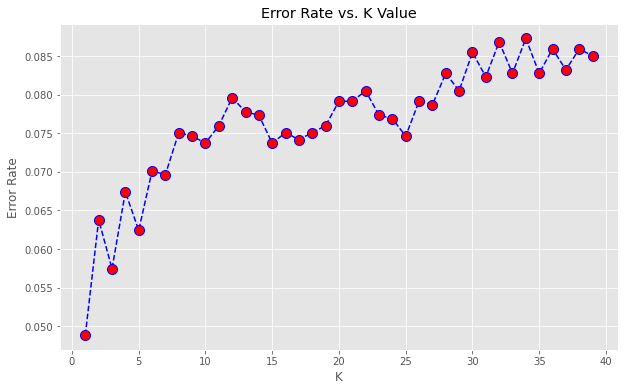

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Hence we choose K=3 as our optimal value for final model.

In [30]:
opt_knn = KNeighborsClassifier(n_neighbors=3)

opt_knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[ 866  105]
 [  83 1157]]


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       971
           1       0.92      0.93      0.92      1240

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



## **Decision Tree and Random Forest Classifier**

Implementing a Decision Tree.

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       971
           1       0.96      0.96      0.96      1240

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [33]:
print(confusion_matrix(y_test,predictions))

[[ 927   44]
 [  45 1195]]


A group of decision trees combined make up a Random Forest Classifier Model. Which we are going to implement in the next few block of codes.

In [34]:
from sklearn.ensemble import RandomForestClassifier
error= []
# Will take some time
for i in range(550,600):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error.append(np.mean(pred_i != y_test))

We again use Elbow method to evaluate optimal value for n_estimator (which is basically the number of trees in your forest.)

In [35]:
error.index(min(error))

33

We determine where the lowest error rate occurs at and use that as our value for n_estimator.

Text(0, 0.5, 'Error Rate')

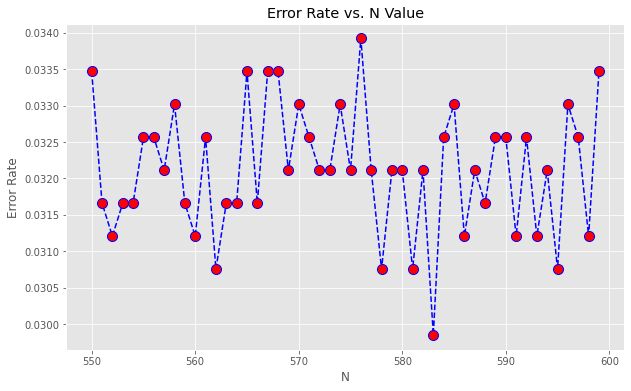

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(550,600),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. N Value')
plt.xlabel('N')
plt.ylabel('Error Rate')

In [37]:
rfc = RandomForestClassifier(n_estimators=571)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

## **Support Vector Machines**

We will be implementing Support Vector Classifier in the following section.

In [157]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
predictions = svc.predict(X_test)

In [159]:
print(confusion_matrix(y_test,predictions))

[[ 893   78]
 [  51 1189]]


In [160]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       971
           1       0.94      0.96      0.95      1240

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



We Notice that the SVC gives an accuracy of ~94%, which is pretty good, but can we fine tune the parameters to get more out of the model.

In [161]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.572, total=   5.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.579, total=   4.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.579, total=   4.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.584, total=   4.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.581, total=   4.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.934, total=   1.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.937, total=   1.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.938, total=   2.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.933, total=   2.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [162]:
predictions=grid.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[ 925   46]
 [  38 1202]]


Using GridSearchCV we are able to arrive at the best values for parameters in the given range and increase accuracy to ~96%.

In [163]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       971
           1       0.96      0.97      0.97      1240

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



## **Comparing Prediction Scores**

Accuracy Scores for Logistic Regression Section

In [214]:
log_reg_acc=accuracy_score(y_test, lm.predict(X_test))*100
opt_log_reg_acc=accuracy_score(y_test, random_model.predict(X_test))*100
print("Accuracy Score for Logistic Regression Model is",log_reg_acc,"%")
print("Accuracy Score for Logistic Regression Model with parameters optimized using RandomSearchCV is",opt_log_reg_acc,"%")

Accuracy Score for Logistic Regression Model is 92.22071460877432 %
Accuracy Score for Logistic Regression Model with parameters optimized using RandomSearchCV is 92.22071460877432 %


Accuracy Scores for K-Nearest Neighbours  Section

In [215]:
knn_acc=accuracy_score(y_test, knn.predict(X_test))*100
opt_knn_acc=accuracy_score(y_test, opt_knn.predict(X_test))*100
print("Accuracy Score for K-Nearest Neighbours model is",knn_acc,"%")
print("Accuracy Score for K-Nearest Neighbours model after applying Elbow Method is",opt_knn_acc,"%")

Accuracy Score for K-Nearest Neighbours model is 91.45183175033921 %
Accuracy Score for K-Nearest Neighbours after applying Elbow Method is model is 95.11533242876527 %


Accuracy Scores for Decision Tree and Random Forest Classifier Section

In [218]:
dtree_acc=accuracy_score(y_test, dtree.predict(X_test))*100
rfc_acc=accuracy_score(y_test, rfc.predict(X_test))*100
print("Accuracy Score for Decision Tree is",dtree_acc,"%")
print("Accuracy Score for Random Forest Classifier after applying Elbow Method is",rfc_acc,"%")

Accuracy Score for Decision Tree is 96.06512890094979 %
Accuracy Score for Random Forest Classifier after applying Elbow Method is 96.69832654907282 %


Accuracy Scores for Support Vector Machine Section

In [219]:
svc_acc=accuracy_score(y_test, svc.predict(X_test))*100
opt_svc_acc=accuracy_score(y_test, grid.predict(X_test))*100
print("Accuracy Score for Support Vector Classifier is",svc_acc,"%")
print("Accuracy Score for Support Vector Classifier after applying GridSearchCV is",opt_svc_acc,"%")

Accuracy Score for Support Vector Classifier is 94.16553595658074 %
Accuracy Score for Support Vector Classifier after applying GridSearchCV is 96.20081411126186 %


**Looking at the Accuracy Scores we can safely say that Random Forest Classifier outperforms any other Classification Model**